In [87]:
import pandas as pd 
import os 
import numpy as np
import statistics  as sts

In [88]:
df_ct = pd.read_pickle(r'C:\Users\Financeiro\Desktop\CIENTISTA DE DADOS\TERA\PROJETO TERA GRUPO2\grupo_2_tera-developer\projeto_principal\main\cotacao_commodities.pkl')
df_tm = pd.read_pickle(r'C:\Users\Financeiro\Desktop\CIENTISTA DE DADOS\TERA\PROJETO TERA GRUPO2\grupo_2_tera-developer\projeto_principal\main\negociacao_derivativos_commodities.pkl')

In [89]:
df_ct.head(2)

data_cotacao    cod_ric cod_ticker cotacao_tipo  fator_conversao  \
0   2019-08-23  BACAINDXF   BACAINDX   FECHAMENTO              1.0   
1   2019-08-23     ICFU19       AXU9       AJUSTE              1.0   

  bolsa_negociacao             tipo_mercadoria mercadoria          moeda  \
0              BMF     GORDO - ESALQ SÃO PAULO        BOI           REAL   
1              BMF  ARABICO EM GRAOS- TIPO 4/5       CAFE  DOLAR DOS EUA   

  unidade_mercadoria  valor_cotacao  
0     ARROBA LIQUIDA         156.10  
1         SACA(60KG)         111.35

In [90]:
df_ct.dtypes

data_cotacao          datetime64[ns]
cod_ric                       object
cod_ticker                    object
cotacao_tipo                  object
fator_conversao              float64
bolsa_negociacao              object
tipo_mercadoria               object
mercadoria                    object
moeda                         object
unidade_mercadoria            object
valor_cotacao                float64
dtype: object

In [91]:
df_tm.head(2)

data_referencia data_inicio data_vencimento numero_contrato mercadoria  \
0      2019-07-18  2019-07-17      2019-08-30        77902613   BORRACHA   
1      2019-07-18  2019-07-18      2020-01-14        77902616      MILHO   

                tipo bolsa unidade_negociacao      moeda  \
0              TSR20   SGX   TONELADA METRICA  (220) USD   
1  EM GRAOS A GRANEL   BMF         SACA(60KG)  (790) BRL   

   quantidade_negociada   vendedor  comprador  
0                     2  Cliente 1    Mercado  
1                 11250    Mercado  Cliente 1

In [92]:
df_tm.dtypes

data_referencia         datetime64[ns]
data_inicio             datetime64[ns]
data_vencimento         datetime64[ns]
numero_contrato                 object
mercadoria                      object
tipo                            object
bolsa                           object
unidade_negociacao              object
moeda                           object
quantidade_negociada             int64
vendedor                        object
comprador                       object
dtype: object

In [93]:
#Tratando a coluna ftxt_moeda x MOEDA
df_tm.moeda.value_counts()

(220) USD     27857
(790) BRL      4414
 (220) USD       21
 (790) BRL        8
Name: moeda, dtype: int64

In [94]:
# Cria coluna com nome Moeda_trat - Tratamento da coluna MOEDA para o merge
conditionlist = [
    (df_ct['moeda'] == 'DOLAR DOS EUA'),
    (df_ct['moeda'] == 'REAL'),
    (df_ct['moeda'] == 'IUAN RENMIMBI/CHI')]
choicelist = ['(220)USD', '(790)BRL', 'IUAN RENMIMBI/CHI']
df_ct['moeda_trat'] = np.select(conditionlist, choicelist, default='Not Specified')

In [95]:
df_ct.moeda_trat.value_counts()

(220)USD             160060
(790)BRL              16302
IUAN RENMIMBI/CHI       230
Name: moeda_trat, dtype: int64

In [96]:
# Tranformando variavel em string e retirando o espaço ' ' inicial da variavel 
df_tm['moeda'] = df_tm['moeda'].astype(str)
df_tm['moeda'] = df_tm.moeda.str.replace(' ','')

In [97]:
# Verificando o tratamento da coluna ftxt_moeda x MOEDA
df_tm.moeda.value_counts()

(220)USD    27878
(790)BRL     4422
Name: moeda, dtype: int64

In [98]:
#verificando e tratando da coluna bolsa
df_tm.bolsa.value_counts()

ICE (NYBOT)    11226
LME             9003
CBOT            4848
BMF             4370
NYMEX           1445
CMX              752
SGX              419
LPPM             130
CCEE              76
LBMA              31
Name: bolsa, dtype: int64

In [99]:
df_ct.bolsa_negociacao.value_counts()

ICE (NYBOT)    48343
NYMEX          26281
CBOT           25654
LME            25422
BMF            15135
LPPM           10236
SGX             7845
CMX             5741
LBMA            5170
CCEE            2596
CME             1751
CEPEA           1667
PETROBRAS        521
SHF              230
Name: bolsa_negociacao, dtype: int64

In [100]:
#verificando mercadoria
df_ct.mercadoria.value_counts()

PETROLEO                  35916
SOJA                      16910
ALUMINIO                  15171
CAFE                      13640
MILHO                      9620
ACUCAR                     7353
OURO                       7333
OLEO                       7306
PLATINA                    5656
PALADIO                    5186
BOI                        5180
BORRACHA                   4265
GAS NATURAL                4049
ETANOL                     3846
ALGODAO                    3483
COBRE                      2927
MINERIO DE FERRO           2887
ENERGIA ELETRICA           2596
CHUMBO                     2360
ESTANHO                    2360
NIQUEL                     2360
ZINCO                      2360
UREIA                      2200
CARVAO                     2174
ARROZ                      1734
PRATA                      1300
GASOLINA                   1238
SUINOS                      919
SUCO DE LARANJA             831
OLEO COMBUSTIVEL            822
GASOLEO                     818
TRIGO   

In [101]:
#verificando mercadoria
df_tm.mercadoria.value_counts()

ALUMINIO                  6477
ACUCAR                    5557
CAFE                      4250
SOJA                      4081
MILHO                     3038
BOI                       1818
COBRE                     1646
PETROLEO                  1077
OLEO                       925
OURO                       713
ZINCO                      493
ALGODAO                    459
MINERIO DE FERRO           309
GASOLINA                   216
NIQUEL                     214
ETANOL                     206
ESTANHO                    145
GAS NATURAL                125
PLATINA                     88
ENERGIA ELETRICA            76
GASOLEO                     68
BORRACHA                    66
PALADIO                     54
PRATA                       52
CARVAO                      45
ACUCAR BRL D_0              32
ACO                         18
BOBINA DE ACO LAMINADO      18
CHUMBO                      10
TRIGO                        8
UREIA                        8
SUCO DE LARANJA              5
CAFE BRL

In [115]:
df_ct.unidade_mercadoria.value_counts()

BARRIL                    35916
POUND                     28219
TONELADA METRICA          20736
ONCA TROY                 19380
TONELADA                  19315
BUSHELS                   12550
GALAO                      8789
SACA(60KG)                 8365
SHORT TONELADA             6527
ARROBA LIQUIDA             4432
MMBTU                      4049
METRO CUBICO               3487
MWH                        2596
HUNDREDWEIGHT (CWT)        1734
LITRO                       359
250G                         95
E-MINI S&P 500 FUTURES       41
USD POR BTC                   1
USD POR ETH                   1
Name: unidade_mercadoria, dtype: int64

In [116]:
df_tm.unidade_negociacao.value_counts()

POUND               11274
TONELADA             8905
BUSHELS              3302
SACA(60KG)           2346
ARROBA LIQUIDA       1818
GALAO                1141
BARRIL               1077
ONCA TROY             907
TONELADA METRICA      616
SHORT TONELADA        507
METRO CUBICO          206
MMBTU                 125
MWH                    76
Name: unidade_negociacao, dtype: int64

In [109]:
df_ct

data_cotacao     cod_ric cod_ticker cotacao_tipo  fator_conversao  \
0     2019-08-23   BACAINDXF   BACAINDX   FECHAMENTO              1.0   
1     2019-08-23      ICFU19       AXU9       AJUSTE              1.0   
2     2019-08-23      ICFU20       AXU0       AJUSTE              1.0   
3     2019-08-23      ICFZ20       AXZ0       AJUSTE              1.0   
4     2019-08-23      ICFK20       AXK0       AJUSTE              1.0   
..           ...         ...        ...          ...              ...   
327   2022-05-18  XPTFIXAM=S   PLTMLNAM       MAXIMO              1.0   
328   2022-05-18   XPTFIXPM=   PLTMLNPM       AJUSTE              1.0   
329   2022-05-18  XPTFIXPM=F   PLTMLNPM   FECHAMENTO              1.0   
330   2022-05-18  XPTFIXPM=I   PLTMLNPM       MINIMO              1.0   
331   2022-05-18  XPTFIXPM=S   PLTMLNPM       MAXIMO              1.0   

    bolsa_negociacao             tipo_mercadoria mercadoria          moeda  \
0                BMF     GORDO - ESALQ SÃO PAULO        BOI           REAL   
1                BMF  ARABICO EM GRAOS- TIPO 4/5       CAFE  DOLAR DOS EUA   
2                BMF  ARABICO EM GRAOS- TIPO 4/5       CAFE  DOLAR DOS EUA   
3                BMF  ARABICO EM GRAOS- TIPO 4/5       CAFE  DOLAR DOS EUA   
4                BMF  ARABICO EM GRAOS- TIPO 4/5       CAFE  DOLAR DOS EUA   
..               ...                         ...        ...            ...   
327             LPPM             FIXING DA MANHA    PLATINA  DOLAR DOS EUA   
328             LPPM             FIXING DA TARDE    PLATINA  DOLAR DOS EUA   
329             LPPM             FIXING DA TARDE    PLATINA  DOLAR DOS EUA   
330             LPPM             FIXING DA TARDE    PLATINA  DOLAR DOS EUA   
331             LPPM             FIXING DA TARDE    PLATINA  DOLAR DOS EUA   

    unidade_mercadoria  valor_cotacao moeda_trat  
0       ARROBA LIQUIDA         156.10   (790)BRL  
1           SACA(60KG)         111.35   (220)USD  
2           SACA(60KG)         122.65   (220)USD  
3           SACA(60KG)         125.70   (220)USD  
4           SACA(60KG)         122.50   (220)USD  
..                 ...            ...        ...  
327          ONCA TROY         960.00   (220)USD  
328          ONCA TROY         948.00   (220)USD  
329          ONCA TROY         948.00   (220)USD  
330          ONCA TROY         948.00   (220)USD  
331          ONCA TROY         948.00   (220)USD  

[176592 rows x 12 columns]

In [110]:
df_tm

data_referencia data_inicio data_vencimento numero_contrato mercadoria  \
0       2019-07-18  2019-07-17      2019-08-30        77902613   BORRACHA   
1       2019-07-18  2019-07-18      2020-01-14        77902616      MILHO   
2       2019-07-18  2019-07-18      2019-08-16        77902620       CAFE   
3       2019-07-18  2019-07-17      2019-09-30        77902621   BORRACHA   
4       2019-07-18  2019-07-17      2019-08-30        77902625   BORRACHA   
..             ...         ...             ...             ...        ...   
42      2022-05-18  2022-05-18      2022-06-14        99928992       CAFE   
43      2022-05-18  2022-05-18      2022-07-18        99928993      MILHO   
44      2022-05-18  2022-05-18      2022-06-14        99928994       CAFE   
45      2022-05-18  2022-05-18      2022-09-01        99928995   ALUMINIO   
46      2022-05-18  2022-05-18      2022-05-31        99928996   PETROLEO   

                              tipo        bolsa unidade_negociacao     moeda  \
0                            TSR20          SGX   TONELADA METRICA  (220)USD   
1                EM GRAOS A GRANEL          BMF         SACA(60KG)  (790)BRL   
2                          ARABICO  ICE (NYBOT)              POUND  (220)USD   
3                            TSR20          SGX   TONELADA METRICA  (220)USD   
4                            TSR20          SGX   TONELADA METRICA  (220)USD   
..                             ...          ...                ...       ...   
42                         ARABICO  ICE (NYBOT)              POUND  (220)USD   
43               EM GRAOS A GRANEL          BMF         SACA(60KG)  (790)BRL   
44                         ARABICO  ICE (NYBOT)              POUND  (220)USD   
45                            PURO          LME           TONELADA  (220)USD   
46  PRIMEIRO FUTURO OLEO CRU-BRENT  ICE (NYBOT)             BARRIL  (220)USD   

    quantidade_negociada   vendedor  comprador  
0                      2  Cliente 1    Mercado  
1                  11250    Mercado  Cliente 1  
2                 187500    Mercado    Mercado  
3                      2  Cliente 1    Mercado  
4                      2  Cliente 1    Mercado  
..                   ...        ...        ...  
42                562500    Mercado    Mercado  
43               1575000  Cliente 1    Mercado  
44                562500    Mercado  Cliente 1  
45                    25    Mercado    Mercado  
46                 31000  Cliente 1    Mercado  

[32300 rows x 12 columns]

In [112]:
#merge entre cotacoes e negociacoes de derivativos de commodities
df_final = pd.merge(df_tm, df_ct, how = 'right', left_on=['data_inicio','mercadoria','bolsa','unidade_negociacao','moeda'],
                              right_on=['data_cotacao','mercadoria','bolsa_negociacao','unidade_mercadoria','moeda_trat'])
              

In [120]:
df_final

data_referencia data_inicio data_vencimento numero_contrato mercadoria  \
17          2019-08-26  2019-08-23      2019-11-18        77955242      MILHO   
18          2019-08-26  2019-08-23      2019-09-17        77955251      MILHO   
19          2019-08-26  2019-08-23      2019-11-18        77955216      MILHO   
20          2019-08-26  2019-08-23      2019-11-18        77955242      MILHO   
21          2019-08-26  2019-08-23      2019-09-17        77955251      MILHO   
...                ...         ...             ...             ...        ...   
421431      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   
421432      2022-05-18  2022-05-18      2023-04-24        99928958       SOJA   
421433      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   
421480      2022-05-18  2022-05-18      2023-04-24        99928958       SOJA   
421481      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   

                     tipo bolsa unidade_negociacao   moeda_x  \
17      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
18      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
19      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
20      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
21      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
...                   ...   ...                ...       ...   
421431           EM GRAOS  CBOT            BUSHELS  (220)USD   
421432           EM GRAOS  CBOT            BUSHELS  (220)USD   
421433           EM GRAOS  CBOT            BUSHELS  (220)USD   
421480           EM GRAOS  CBOT            BUSHELS  (220)USD   
421481           EM GRAOS  CBOT            BUSHELS  (220)USD   

        quantidade_negociada  ... cod_ric cod_ticker cotacao_tipo  \
17                     450.0  ...  CCMH20      CRDH0       AJUSTE   
18                    1800.0  ...  CCMH20      CRDH0       AJUSTE   
19                    2250.0  ...  CCMH20      CRDH0       AJUSTE   
20                     450.0  ...  CCMF20      CRDF0       AJUSTE   
21                    1800.0  ...  CCMF20      CRDF0       AJUSTE   
...                      ...  ...     ...        ...          ...   
421431               25000.0  ...    S X3       S X3       AJUSTE   
421432               15000.0  ...    S X4       S X4       AJUSTE   
421433               25000.0  ...    S X4       S X4       AJUSTE   
421480               15000.0  ...     Sc1        S 1       AJUSTE   
421481               25000.0  ...     Sc1        S 1       AJUSTE   

       fator_conversao bolsa_negociacao    tipo_mercadoria        moeda_y  \
17                1.00              BMF  EM GRAOS A GRANEL           REAL   
18                1.00              BMF  EM GRAOS A GRANEL           REAL   
19                1.00              BMF  EM GRAOS A GRANEL           REAL   
20                1.00              BMF  EM GRAOS A GRANEL           REAL   
21                1.00              BMF  EM GRAOS A GRANEL           REAL   
...                ...              ...                ...            ...   
421431            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421432            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421433            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421480            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421481            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   

       unidade_mercadoria valor_cotacao moeda_trat  
17             SACA(60KG)        39.440   (790)BRL  
18             SACA(60KG)        39.440   (790)BRL  
19             SACA(60KG)        39.440   (790)BRL  
20             SACA(60KG)        38.850   (790)BRL  
21             SACA(60KG)        38.850   (790)BRL  
...                   ...           ...        ...  
421431            BUSHELS        13.870   (220)USD  
421432            BUSHELS        13.202   (220)USD  
421433            BUSHELS        1

In [108]:
# Verifica valores faltantes
df_final.isnull().sum()

data_referencia         134463
data_inicio             134463
data_vencimento         134463
numero_contrato         134463
mercadoria                   0
tipo                    134463
bolsa                   134463
unidade_negociacao      134463
moeda_x                 134463
quantidade_negociada    134463
vendedor                134463
comprador               134463
data_cotacao              6438
cod_ric                   7560
cod_ticker               12177
cotacao_tipo              6438
fator_conversao           6438
bolsa_negociacao          6438
tipo_mercadoria           6438
moeda_y                   6438
unidade_mercadoria        6438
valor_cotacao             6438
moeda_trat                6438
dtype: int64

In [118]:
df_final = df_final.dropna()

In [119]:
df_final

data_referencia data_inicio data_vencimento numero_contrato mercadoria  \
17          2019-08-26  2019-08-23      2019-11-18        77955242      MILHO   
18          2019-08-26  2019-08-23      2019-09-17        77955251      MILHO   
19          2019-08-26  2019-08-23      2019-11-18        77955216      MILHO   
20          2019-08-26  2019-08-23      2019-11-18        77955242      MILHO   
21          2019-08-26  2019-08-23      2019-09-17        77955251      MILHO   
...                ...         ...             ...             ...        ...   
421431      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   
421432      2022-05-18  2022-05-18      2023-04-24        99928958       SOJA   
421433      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   
421480      2022-05-18  2022-05-18      2023-04-24        99928958       SOJA   
421481      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   

                     tipo bolsa unidade_negociacao   moeda_x  \
17      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
18      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
19      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
20      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
21      EM GRAOS A GRANEL   BMF         SACA(60KG)  (790)BRL   
...                   ...   ...                ...       ...   
421431           EM GRAOS  CBOT            BUSHELS  (220)USD   
421432           EM GRAOS  CBOT            BUSHELS  (220)USD   
421433           EM GRAOS  CBOT            BUSHELS  (220)USD   
421480           EM GRAOS  CBOT            BUSHELS  (220)USD   
421481           EM GRAOS  CBOT            BUSHELS  (220)USD   

        quantidade_negociada  ... cod_ric cod_ticker cotacao_tipo  \
17                     450.0  ...  CCMH20      CRDH0       AJUSTE   
18                    1800.0  ...  CCMH20      CRDH0       AJUSTE   
19                    2250.0  ...  CCMH20      CRDH0       AJUSTE   
20                     450.0  ...  CCMF20      CRDF0       AJUSTE   
21                    1800.0  ...  CCMF20      CRDF0       AJUSTE   
...                      ...  ...     ...        ...          ...   
421431               25000.0  ...    S X3       S X3       AJUSTE   
421432               15000.0  ...    S X4       S X4       AJUSTE   
421433               25000.0  ...    S X4       S X4       AJUSTE   
421480               15000.0  ...     Sc1        S 1       AJUSTE   
421481               25000.0  ...     Sc1        S 1       AJUSTE   

       fator_conversao bolsa_negociacao    tipo_mercadoria        moeda_y  \
17                1.00              BMF  EM GRAOS A GRANEL           REAL   
18                1.00              BMF  EM GRAOS A GRANEL           REAL   
19                1.00              BMF  EM GRAOS A GRANEL           REAL   
20                1.00              BMF  EM GRAOS A GRANEL           REAL   
21                1.00              BMF  EM GRAOS A GRANEL           REAL   
...                ...              ...                ...            ...   
421431            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421432            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421433            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421480            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   
421481            0.01             CBOT           EM GRAOS  DOLAR DOS EUA   

       unidade_mercadoria valor_cotacao moeda_trat  
17             SACA(60KG)        39.440   (790)BRL  
18             SACA(60KG)        39.440   (790)BRL  
19             SACA(60KG)        39.440   (790)BRL  
20             SACA(60KG)        38.850   (790)BRL  
21             SACA(60KG)        38.850   (790)BRL  
...                   ...           ...        ...  
421431            BUSHELS        13.870   (220)USD  
421432            BUSHELS        13.202   (220)USD  
421433            BUSHELS        1

In [135]:
#Conversor de Moedas: O Conversor de Moedas realiza o Web Scrapping do sistema de mesmo nome do Banco Central. Permite que seja importado as cotações diárias de diversas moedas diante do real. Para saber as moedas que são possíveis de importar, e consequentemente seus respectivos símbolos, utiliza-se a função currency.get_currency_list().
from bcb import currency

Lista_moeda = currency.get_currency_list()


In [143]:
Lista_moeda

code               name symbol  country_code  \
0       5  AFEGANE AFEGANIST    AFN           132   
1     785  RANDE/AFRICA SUL     ZAR          7560   
2     490    LEK ALBANIA REP    ALL           175   
3     610  MARCO ALEMAO         DEM           230   
4     978               EURO    EUR           230   
..    ...                ...    ...           ...   
267   220      DOLAR DOS EUA    USD          8630   
268   220      DOLAR DOS EUA    USD          8664   
269   766      QUACHA ZAMBIA    ZMW          8907   
270   765      QUACHA ZAMBIA    ZMK          8907   
271   217     DOLAR ZIMBABUE    ZWL          6653   

                                          country_name type exclusion_date  
0    AFEGANISTAO                                   ...    A            NaT  
1    AFRICA DO SUL                                 ...    A            NaT  
2    ALBANIA, REPUBLICA DA                         ...    A            NaT  
3    ALEMANHA                                      ...    A     2002-01-02  
4    ALEMANHA                                      ...    B            NaT  
..                                                 ...  ...            ...  
267  VIRGENS,ILHAS (BRITANICAS)                    ...    A            NaT  
268  VIRGENS,ILHAS (E.U.A.)                        ...    A            NaT  
269  ZAMBIA                                        ...    A            NaT  
270  ZAMBIA                                        ...    A     2012-12-31  
271  ZIMBABUE                                      ...    A            NaT  

[272 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

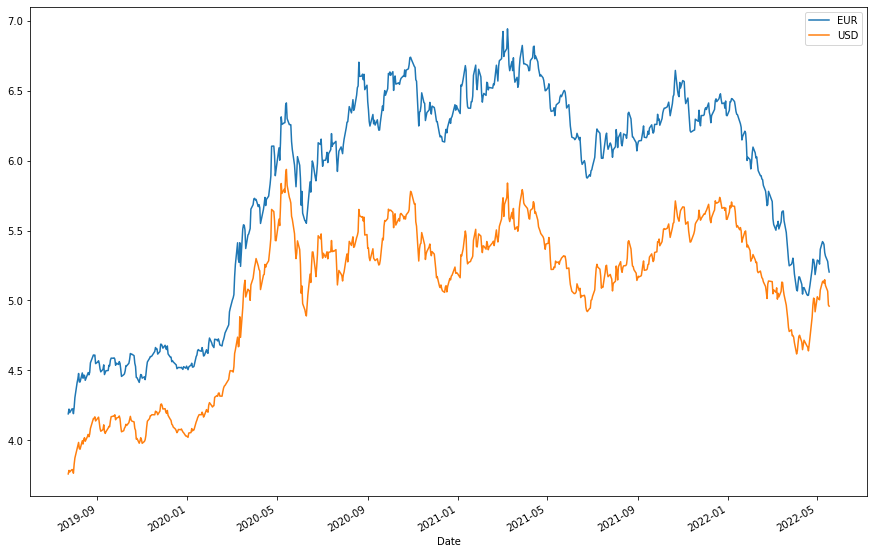

In [147]:
#Após escolhido as moedas de interesse com base na lista do conversor, utiliza-se a função currency.get() para obter as moedas diante do real com base no seus respectivos símbolos e período.
cy = currency.get(['USD', 'EUR'], start='2019-07-24', end='2022-05-18')

# Plota
cy.plot(figsize=(15,10))

In [148]:
cy

EUR     USD
Date                      
2019-07-24  4.1893  3.7596
2019-07-25  4.2232  3.7849
2019-07-26  4.1979  3.7741
2019-07-29  4.2246  3.7909
2019-07-30  4.2251  3.7900
...            ...     ...
2022-05-12  5.3423  5.1482
2022-05-13  5.3179  5.1075
2022-05-16  5.2794  5.0666
2022-05-17  5.2334  4.9676
2022-05-18  5.2037  4.9592

[709 rows x 2 columns]

In [154]:
cy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709 entries, 2019-07-24 to 2022-05-18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUR     709 non-null    float64
 1   USD     709 non-null    float64
dtypes: float64(2)
memory usage: 16.6 KB


In [156]:
#transformando o index em coluna
cy['date'] = cy.index

In [158]:
cy

EUR     USD       date
Date                                 
2019-07-24  4.1893  3.7596 2019-07-24
2019-07-25  4.2232  3.7849 2019-07-25
2019-07-26  4.1979  3.7741 2019-07-26
2019-07-29  4.2246  3.7909 2019-07-29
2019-07-30  4.2251  3.7900 2019-07-30
...            ...     ...        ...
2022-05-12  5.3423  5.1482 2022-05-12
2022-05-13  5.3179  5.1075 2022-05-13
2022-05-16  5.2794  5.0666 2022-05-16
2022-05-17  5.2334  4.9676 2022-05-17
2022-05-18  5.2037  4.9592 2022-05-18

[709 rows x 3 columns]

In [159]:
df_final = df_final.sort_values(['data_inicio'])

In [160]:
df_final

data_referencia data_inicio data_vencimento numero_contrato mercadoria  \
10227       2019-07-24  2019-07-24      2019-08-16        77909420       CAFE   
9844        2019-07-24  2019-07-24      2019-12-03        77909467   ALUMINIO   
9806        2019-07-24  2019-07-24      2019-10-02        77909392   ALUMINIO   
9837        2019-07-24  2019-07-24      2020-05-04        77909450   ALUMINIO   
9838        2019-07-24  2019-07-24      2019-08-02        77909451   ALUMINIO   
...                ...         ...             ...             ...        ...   
421142      2022-05-18  2022-05-18      2022-06-14        99928967       CAFE   
421141      2022-05-18  2022-05-18      2023-08-17        99928966       CAFE   
421140      2022-05-18  2022-05-18      2022-08-15        99928965       CAFE   
421147      2022-05-18  2022-05-18      2023-08-17        99928957       CAFE   
421481      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   

            tipo        bolsa unidade_negociacao   moeda_x  \
10227    ARABICO  ICE (NYBOT)              POUND  (220)USD   
9844        PURO          LME           TONELADA  (220)USD   
9806        PURO          LME           TONELADA  (220)USD   
9837        PURO          LME           TONELADA  (220)USD   
9838        PURO          LME           TONELADA  (220)USD   
...          ...          ...                ...       ...   
421142   ARABICO  ICE (NYBOT)              POUND  (220)USD   
421141   ARABICO  ICE (NYBOT)              POUND  (220)USD   
421140   ARABICO  ICE (NYBOT)              POUND  (220)USD   
421147   ARABICO  ICE (NYBOT)              POUND  (220)USD   
421481  EM GRAOS         CBOT            BUSHELS  (220)USD   

        quantidade_negociada  ...  cod_ric cod_ticker cotacao_tipo  \
10227                75000.0  ...     KCH2       KCH2       AJUSTE   
9844                    75.0  ...  LOAHDYI     LOAHDY       MINIMO   
9806                   325.0  ...  LOAADYF     LOAADY   FECHAMENTO   
9837                    25.0  ...  LOAHDYI     LOAHDY       MINIMO   
9838                   275.0  ...  LOAHDYI     LOAHDY       MINIMO   
...                      ...  ...      ...        ...          ...   
421142               75000.0  ...     KCN3       KCN3       AJUSTE   
421141             2062500.0  ...     KCN3       KCN3       AJUSTE   
421140             2062500.0  ...     KCN3       KCN3       AJUSTE   
421147              172125.0  ...     KCN4       KCN4       AJUSTE   
421481               25000.0  ...      Sc1        S 1       AJUSTE   

       fator_conversao bolsa_negociacao tipo_mercadoria        moeda_y  \
10227             0.01      ICE (NYBOT)         ARABICO  DOLAR DOS EUA   
9844              1.00              LME            PURO  DOLAR DOS EUA   
9806              1.00              LME            LIGA  DOLAR DOS EUA   
9837              1.00              LME            PURO  DOLAR DOS EUA   
9838              1.00              LME            PURO  DOLAR DOS EUA   
...                ...              ...             ...            ...   
421142            0.01      ICE (NYBOT)         ARABICO  DOLAR DOS EUA   
421141            0.01      ICE (NYBOT)         ARABICO  DOLAR DOS EUA   
421140            0.01      ICE (NYBOT)         ARABICO  DOLAR DOS EUA   
421147            0.01      ICE (NYBOT)         ARABICO  DOLAR DOS EUA   
421481            0.01             CBOT        EM GRAOS  DOLAR DOS EUA   

       unidade_mercadoria valor_cotacao moeda_trat  
10227               POUND        1.2490   (220)USD  
9844             TONELADA     1751.5000   (220)USD  
9806             TONELADA     1220.0000   (220)USD  
9837             TONELADA     1751.5000   (220)USD  
9838             TONELADA     1751.5000   (220)USD  
...                   ...           ...        ...  
421142              POUND        2.1400   (220)USD  
421141              POUND        2.1400   (220)USD  
421140              POUND        2.1400   (220)USD  
421147              POUND    

In [168]:
#merge entre cotacoes e negociacoes de derivativos de commodities
df_final2 = pd.merge(df_final, cy, how = 'right', left_on=['data_inicio'],right_on=['date'], validate = 'm:1')

In [169]:
df_final2

data_referencia data_inicio data_vencimento numero_contrato mercadoria  \
0           2019-07-24  2019-07-24      2019-08-16        77909420       CAFE   
1           2019-07-24  2019-07-24      2019-12-03        77909467   ALUMINIO   
2           2019-07-24  2019-07-24      2019-10-02        77909392   ALUMINIO   
3           2019-07-24  2019-07-24      2020-05-04        77909450   ALUMINIO   
4           2019-07-24  2019-07-24      2019-08-02        77909451   ALUMINIO   
...                ...         ...             ...             ...        ...   
281766      2022-05-18  2022-05-18      2022-06-14        99928967       CAFE   
281767      2022-05-18  2022-05-18      2023-08-17        99928966       CAFE   
281768      2022-05-18  2022-05-18      2022-08-15        99928965       CAFE   
281769      2022-05-18  2022-05-18      2023-08-17        99928957       CAFE   
281770      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   

            tipo        bolsa unidade_negociacao   moeda_x  \
0        ARABICO  ICE (NYBOT)              POUND  (220)USD   
1           PURO          LME           TONELADA  (220)USD   
2           PURO          LME           TONELADA  (220)USD   
3           PURO          LME           TONELADA  (220)USD   
4           PURO          LME           TONELADA  (220)USD   
...          ...          ...                ...       ...   
281766   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281767   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281768   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281769   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281770  EM GRAOS         CBOT            BUSHELS  (220)USD   

        quantidade_negociada  ... fator_conversao bolsa_negociacao  \
0                    75000.0  ...            0.01      ICE (NYBOT)   
1                       75.0  ...            1.00              LME   
2                      325.0  ...            1.00              LME   
3                       25.0  ...            1.00              LME   
4                      275.0  ...            1.00              LME   
...                      ...  ...             ...              ...   
281766               75000.0  ...            0.01      ICE (NYBOT)   
281767             2062500.0  ...            0.01      ICE (NYBOT)   
281768             2062500.0  ...            0.01      ICE (NYBOT)   
281769              172125.0  ...            0.01      ICE (NYBOT)   
281770               25000.0  ...            0.01             CBOT   

       tipo_mercadoria        moeda_y unidade_mercadoria valor_cotacao  \
0              ARABICO  DOLAR DOS EUA              POUND        1.2490   
1                 PURO  DOLAR DOS EUA           TONELADA     1751.5000   
2                 LIGA  DOLAR DOS EUA           TONELADA     1220.0000   
3                 PURO  DOLAR DOS EUA           TONELADA     1751.5000   
4                 PURO  DOLAR DOS EUA           TONELADA     1751.5000   
...                ...            ...                ...           ...   
281766         ARABICO  DOLAR DOS EUA              POUND        2.1400   
281767         ARABICO  DOLAR DOS EUA              POUND        2.1400   
281768         ARABICO  DOLAR DOS EUA              POUND        2.1400   
281769         ARABICO  DOLAR DOS EUA              POUND        2.0375   
281770        EM GRAOS  DOLAR DOS EUA            BUSHELS       16.6270   

        moeda_trat     EUR     USD       date  
0         (220)USD  4.1893  3.7596 2019-07-24  
1         (220)USD  4.1893  3.7596 2019-07-24  
2         (220)USD  4.1893  3.7596 2019-07-24  
3         (220)USD  4.1893  3.7596 2019-07-24  
4         (220)USD  4.1893  3.7596 2019-07-24  
...            ...     ...     ...        ...  
281766    (220)USD  5.2037  4.9592 2022-05-18  
281767    (220)USD  5.2037  4.9592 2022-05-18  
281768    (220)USD  5.2037  4.9592 2022-05-18  
281769    (220)USD  5.2037  4.9592 2022-05-18  
281770    (220)USD  5.2037  4.9

In [170]:
df_final2.drop(columns=['EUR', 'date'])

data_referencia data_inicio data_vencimento numero_contrato mercadoria  \
0           2019-07-24  2019-07-24      2019-08-16        77909420       CAFE   
1           2019-07-24  2019-07-24      2019-12-03        77909467   ALUMINIO   
2           2019-07-24  2019-07-24      2019-10-02        77909392   ALUMINIO   
3           2019-07-24  2019-07-24      2020-05-04        77909450   ALUMINIO   
4           2019-07-24  2019-07-24      2019-08-02        77909451   ALUMINIO   
...                ...         ...             ...             ...        ...   
281766      2022-05-18  2022-05-18      2022-06-14        99928967       CAFE   
281767      2022-05-18  2022-05-18      2023-08-17        99928966       CAFE   
281768      2022-05-18  2022-05-18      2022-08-15        99928965       CAFE   
281769      2022-05-18  2022-05-18      2023-08-17        99928957       CAFE   
281770      2022-05-18  2022-05-18      2022-06-29        99928984       SOJA   

            tipo        bolsa unidade_negociacao   moeda_x  \
0        ARABICO  ICE (NYBOT)              POUND  (220)USD   
1           PURO          LME           TONELADA  (220)USD   
2           PURO          LME           TONELADA  (220)USD   
3           PURO          LME           TONELADA  (220)USD   
4           PURO          LME           TONELADA  (220)USD   
...          ...          ...                ...       ...   
281766   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281767   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281768   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281769   ARABICO  ICE (NYBOT)              POUND  (220)USD   
281770  EM GRAOS         CBOT            BUSHELS  (220)USD   

        quantidade_negociada  ... cod_ticker cotacao_tipo fator_conversao  \
0                    75000.0  ...       KCH2       AJUSTE            0.01   
1                       75.0  ...     LOAHDY       MINIMO            1.00   
2                      325.0  ...     LOAADY   FECHAMENTO            1.00   
3                       25.0  ...     LOAHDY       MINIMO            1.00   
4                      275.0  ...     LOAHDY       MINIMO            1.00   
...                      ...  ...        ...          ...             ...   
281766               75000.0  ...       KCN3       AJUSTE            0.01   
281767             2062500.0  ...       KCN3       AJUSTE            0.01   
281768             2062500.0  ...       KCN3       AJUSTE            0.01   
281769              172125.0  ...       KCN4       AJUSTE            0.01   
281770               25000.0  ...        S 1       AJUSTE            0.01   

       bolsa_negociacao tipo_mercadoria        moeda_y  unidade_mercadoria  \
0           ICE (NYBOT)         ARABICO  DOLAR DOS EUA               POUND   
1                   LME            PURO  DOLAR DOS EUA            TONELADA   
2                   LME            LIGA  DOLAR DOS EUA            TONELADA   
3                   LME            PURO  DOLAR DOS EUA            TONELADA   
4                   LME            PURO  DOLAR DOS EUA            TONELADA   
...                 ...             ...            ...                 ...   
281766      ICE (NYBOT)         ARABICO  DOLAR DOS EUA               POUND   
281767      ICE (NYBOT)         ARABICO  DOLAR DOS EUA               POUND   
281768      ICE (NYBOT)         ARABICO  DOLAR DOS EUA               POUND   
281769      ICE (NYBOT)         ARABICO  DOLAR DOS EUA               POUND   
281770             CBOT        EM GRAOS  DOLAR DOS EUA             BUSHELS   

       valor_cotacao moeda_trat     USD  
0             1.2490   (220)USD  3.7596  
1          1751.5000   (220)USD  3.7596  
2          1220.0000   (220)USD  3.7596  
3          1751.5000   (220)USD  3.7596  
4          1751.5000   (220)USD  3.7596  
...              ...        ...     ...  
281766        2.1400   (220)USD  4.9592  
281767        2.1400   (220)USD  4.9592  
281768        2.1400   (220)USD  4.9592  
281769 